## Installing necessary libraries

In [21]:
import pandas as pd
import numpy as np
pd.set_option('display.max_rows', 300)
from sklearn.ensemble import RandomForestClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestRegressor
from scipy.stats import pointbiserialr
import pingouin as pg
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.metrics import classification_report, accuracy_score
from scipy.stats import pointbiserialr

### Load the file preprocessed from stage 1

In [2]:
big_df=pd.read_csv("big_df.csv")
big_df=big_df.drop(["Unnamed: 0"],axis=1)
big_df

/tmp/ipykernel_247498/3784010270.py:1: DtypeWarning: Columns (4,6,19,20,23,26,31,32,37,38,49,50,51,52,53,54,57,58,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,86,117,118,119,120,121,122,131) have mixed types. Specify dtype option on import or set low_memory=False.
  big_df=pd.read_csv("big_df.csv")


,AdiposeExposed,AdiposeNecrosisExposed,area,AtrophieBlanche,BoneNecrosisExposed,BrawnyInduration,Callus,CapsuleExposed,CapsuleNecrosisExposed,CompDiet,...,Patient_DocumentType,Age,Patient_RiskLevel,Patient_Score,SmokingStatus,PatientIDWoundNumber,Wound_healing_status,DayNumber,Stage_Type,Updated_Stage
0,True,False,33.60,False,False,False,False,False,False,1.0,...,PatientDocument,65.73,At risk of malnutrition,11.0,3.0,10000074_1,Unknown,1,14_6,Stage 2 Pressure Injury
1,True,False,38.00,False,False,False,False,False,False,1.0,...,PatientDocument,65.75,At risk of malnutrition,11.0,3.0,10000074_1,Not healing,8,14_6,Stage 2 Pressure Injury
2,True,False,40.28,False,False,False,False,False,False,1.0,...,PatientDocument,65.77,At risk of malnutrition,11.0,3.0,10000074_1,Not healing,15,14_6,Stage 2 Pressure Injury
3,True,False,40.28,False,False,False,False,False,False,1.0,...,PatientDocument,65.79,At risk of malnutrition,11.0,3.0,10000074_1,Not healing,22,14_6,Stage 2 Pressure Injury
4,True,False,30.00,False,False,False,False,False,False,1.0,...,PatientDocument,65.81,At risk of malnutrition,11.0,3.0,10000074_1,Grey,29,14_6,Stage 2 Pressure Injury
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
197469,False,False,169.00,False,False,False,False,False,False,1.0,...,PatientDocument,68.86,Normal nutritional status,12.0,4.0,9996014_1,Not healing,72,8_3,Stage 3 Pressure Injury
197470,False,False,130.00,False,False,False,False,False,False,1.0,...,PatientDocument,68.87,Normal nutritional status,12.0,4.0,9996014_1,Grey,75,8_3,Stage 3 Pressure Injury
197471,False,False,110.00,False,False,False,False,False,False,1.0,...,PatientDocument,68.88,Normal nutritional status,12.0,4.0,9996014_1,Not healing,80,8_3,Stage 3 Pressure Injury
197472,False,False,110.00,False,False,False,False,False,False,1.0,...,PatientDocument,68.90,Normal nutritional status,12.0,4.0,9996014_1,Not healing,87,8_3,Stage 3 Pressure Injury


### Change the date values format, removing the time and keeping them as only the day number from first visit/ first assessment

In [ ]:
big_df_1=pd.DataFrame()
    
unique_wounds=big_df["PatientIDWoundNumber"].unique().tolist()

for i in range(len(unique_wounds)):
#     if i>0:
#         break
    print(i)
    
    wound=unique_wounds[i]
    df_wound=big_df.query("PatientIDWoundNumber==@wound")
    # Convert 'DateAdded_woundassessment' column to datetime type
    df_wound['DateAdded_woundassessment'] = pd.to_datetime(df_wound['DateAdded_woundassessment'])
    
    # Convert the 'Date' column to datetime
    df_wound['DateAdded_woundassessment'] = pd.to_datetime(df_wound['DateAdded_woundassessment'])
    df_wound['DateAcquired'] = pd.to_datetime(df_wound['DateAcquired'])
    #df_wound['DateWoundHealed'] = pd.to_datetime(df_wound['DateWoundHealed'])
    df_wound['DateAdded_wound'] = pd.to_datetime(df_wound['DateAdded_wound'])
    df_wound['DateOfDeath'] = pd.to_datetime(df_wound['DateOfDeath'])
    df_wound['DateAdded_patient'] = pd.to_datetime(df_wound['DateAdded_patient'])
    #df_wound['DateOfAccident'] = pd.to_datetime(df_wound['DateOfAccident'])
    df_wound['PatientDOB'] = pd.to_datetime(df_wound['PatientDOB'])
    df_wound['AdmissionDate'] = pd.to_datetime(df_wound['AdmissionDate'])
    df_wound['Admission_dateAdded'] = pd.to_datetime(df_wound['Admission_dateAdded'])
    df_wound['StartDate'] = pd.to_datetime(df_wound['StartDate'])
    
    
    


    # Find the minimum date in the DataFrame
    first_date = df_wound['DateAdded_woundassessment'].min()

    # Calculate the day differences relative to the first date
    df_wound['DateAcquired'] = (df_wound['DateAcquired'] - first_date).dt.days + 1
    #df_wound['DateWoundHealed'] = (df_wound['DateWoundHealed'] - first_date).dt.days + 1
    df_wound['DateAdded_wound'] = (df_wound['DateAdded_wound'] - first_date).dt.days + 1
    df_wound['DateOfDeath'] = (df_wound['DateOfDeath'] - first_date).dt.days + 1
    df_wound['DateAdded_patient'] = (df_wound['DateAdded_patient'] - first_date).dt.days + 1
    #df_wound['DateOfAccident'] = (df_wound['DateOfAccident'] - first_date).dt.days + 1
    df_wound['PatientDOB'] = (df_wound['PatientDOB'] - first_date).dt.days + 1
    df_wound['AdmissionDate'] = (df_wound['AdmissionDate'] - first_date).dt.days + 1
    df_wound['Admission_dateAdded'] = (df_wound['Admission_dateAdded'] - first_date).dt.days + 1
    df_wound['StartDate'] = (df_wound['StartDate'] - first_date).dt.days + 1
    
    
    big_df_1 = pd.concat([big_df_1, df_wound], axis=0)


In [4]:
big_df_1

,AdiposeExposed,AdiposeNecrosisExposed,area,AtrophieBlanche,BoneNecrosisExposed,BrawnyInduration,Callus,CapsuleExposed,CapsuleNecrosisExposed,CompDiet,...,Patient_DocumentType,Age,Patient_RiskLevel,Patient_Score,SmokingStatus,PatientIDWoundNumber,Wound_healing_status,DayNumber,Stage_Type,Updated_Stage
0,True,False,33.60,False,False,False,False,False,False,1.0,...,PatientDocument,65.73,At risk of malnutrition,11.0,3.0,10000074_1,Unknown,1,14_6,Stage 2 Pressure Injury
1,True,False,38.00,False,False,False,False,False,False,1.0,...,PatientDocument,65.75,At risk of malnutrition,11.0,3.0,10000074_1,Not healing,8,14_6,Stage 2 Pressure Injury
2,True,False,40.28,False,False,False,False,False,False,1.0,...,PatientDocument,65.77,At risk of malnutrition,11.0,3.0,10000074_1,Not healing,15,14_6,Stage 2 Pressure Injury
3,True,False,40.28,False,False,False,False,False,False,1.0,...,PatientDocument,65.79,At risk of malnutrition,11.0,3.0,10000074_1,Not healing,22,14_6,Stage 2 Pressure Injury
4,True,False,30.00,False,False,False,False,False,False,1.0,...,PatientDocument,65.81,At risk of malnutrition,11.0,3.0,10000074_1,Grey,29,14_6,Stage 2 Pressure Injury
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
197469,False,False,169.00,False,False,False,False,False,False,1.0,...,PatientDocument,68.86,Normal nutritional status,12.0,4.0,9996014_1,Not healing,72,8_3,Stage 3 Pressure Injury
197470,False,False,130.00,False,False,False,False,False,False,1.0,...,PatientDocument,68.87,Normal nutritional status,12.0,4.0,9996014_1,Grey,75,8_3,Stage 3 Pressure Injury
197471,False,False,110.00,False,False,False,False,False,False,1.0,...,PatientDocument,68.88,Normal nutritional status,12.0,4.0,9996014_1,Not healing,80,8_3,Stage 3 Pressure Injury
197472,False,False,110.00,False,False,False,False,False,False,1.0,...,PatientDocument,68.90,Normal nutritional status,12.0,4.0,9996014_1,Not healing,87,8_3,Stage 3 Pressure Injury


In [5]:
big_df=big_df_1.drop(["DateAdded_woundassessment", "firstAssessmentDate"], axis=1)

In [6]:
big_df.to_csv("big_df_preprocessed3.csv")

In [3]:
big_df=pd.read_csv("big_df_preprocessed3.csv")
big_df=big_df.drop(["Unnamed: 0"], axis=1)
big_df

/tmp/ipykernel_278427/1052686192.py:1: DtypeWarning: Columns (4,6,19,20,23,26,31,32,37,38,49,50,51,52,53,54,57,58,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,86,115,116,117,119,129) have mixed types. Specify dtype option on import or set low_memory=False.
  big_df=pd.read_csv("big_df_preprocessed3.csv")


,AdiposeExposed,AdiposeNecrosisExposed,area,AtrophieBlanche,BoneNecrosisExposed,BrawnyInduration,Callus,CapsuleExposed,CapsuleNecrosisExposed,CompDiet,...,Patient_DocumentType,Age,Patient_RiskLevel,Patient_Score,SmokingStatus,PatientIDWoundNumber,Wound_healing_status,DayNumber,Stage_Type,Updated_Stage
0,True,False,33.60,False,False,False,False,False,False,1.0,...,PatientDocument,65.73,At risk of malnutrition,11.0,3.0,10000074_1,Unknown,1,14_6,Stage 2 Pressure Injury
1,True,False,38.00,False,False,False,False,False,False,1.0,...,PatientDocument,65.75,At risk of malnutrition,11.0,3.0,10000074_1,Not healing,8,14_6,Stage 2 Pressure Injury
2,True,False,40.28,False,False,False,False,False,False,1.0,...,PatientDocument,65.77,At risk of malnutrition,11.0,3.0,10000074_1,Not healing,15,14_6,Stage 2 Pressure Injury
3,True,False,40.28,False,False,False,False,False,False,1.0,...,PatientDocument,65.79,At risk of malnutrition,11.0,3.0,10000074_1,Not healing,22,14_6,Stage 2 Pressure Injury
4,True,False,30.00,False,False,False,False,False,False,1.0,...,PatientDocument,65.81,At risk of malnutrition,11.0,3.0,10000074_1,Grey,29,14_6,Stage 2 Pressure Injury
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
197469,False,False,169.00,False,False,False,False,False,False,1.0,...,PatientDocument,68.86,Normal nutritional status,12.0,4.0,9996014_1,Not healing,72,8_3,Stage 3 Pressure Injury
197470,False,False,130.00,False,False,False,False,False,False,1.0,...,PatientDocument,68.87,Normal nutritional status,12.0,4.0,9996014_1,Grey,75,8_3,Stage 3 Pressure Injury
197471,False,False,110.00,False,False,False,False,False,False,1.0,...,PatientDocument,68.88,Normal nutritional status,12.0,4.0,9996014_1,Not healing,80,8_3,Stage 3 Pressure Injury
197472,False,False,110.00,False,False,False,False,False,False,1.0,...,PatientDocument,68.90,Normal nutritional status,12.0,4.0,9996014_1,Not healing,87,8_3,Stage 3 Pressure Injury


## Check the datatype 

In [4]:
big_df.dtypes

AdiposeExposed                            object
AdiposeNecrosisExposed                    object
area                                     float64
AtrophieBlanche                           object
BoneNecrosisExposed                       object
BrawnyInduration                          object
Callus                                    object
CapsuleExposed                            object
CapsuleNecrosisExposed                    object
CompDiet                                 float64
CompDressing                             float64
CompExercise                             float64
CompHBOVisits                            float64
CompLimb                                 float64
CompMedication                           float64
CompOffLoad                              float64
CompSmoking                              float64
CompWoundVisits                          float64
Crepitus                                  object
Cyanosis                                  object
Denuded             

## Checking the values of each features one by one and finalizing which ones are categorical and which ones are numerical

In [5]:
for column_name in big_df.columns:
    unique_values = big_df[column_name].unique()
    print(f"{column_name}: {unique_values}")

AdiposeExposed: [True nan False]
AdiposeNecrosisExposed: [False nan True]
area: [  33.6    38.     40.28 ... 1752.35  197.22   18.04]
AtrophieBlanche: [False nan True]
BoneNecrosisExposed: [False nan True]
BrawnyInduration: [False nan True]
Callus: [False nan True]
CapsuleExposed: [False nan True]
CapsuleNecrosisExposed: [False nan True]
CompDiet: [ 1. nan]
CompDressing: [ 1. nan]
CompExercise: [ 1. nan]
CompHBOVisits: [ 1. nan]
CompLimb: [ 1. nan]
CompMedication: [ 1. nan]
CompOffLoad: [ 1. nan]
CompSmoking: [ 1. nan]
CompWoundVisits: [ 1. nan]
Crepitus: [False nan True]
Cyanosis: [False nan True]
Denuded: [False nan True]
DryScaly: [False nan True]
Ecchymosis: [False nan True]
Edema: [False nan True]
Erythema: [False nan True]
Excoriation: [False nan True]
ExposedBone: [True nan False]
ExposedMuscle: [False nan True]
ExposedTendon: [False nan True]
ExudateAmount: [ 1.  5. nan  3.  2.  6.  7.  4.]
Fluctuance: [False nan True]
Friable: [False nan True]
GranulatedHyperGranulated: [ 1. n

## Change the datatype of the categorical values

In [6]:
categorical_features=["CompDiet", "CompDressing", "CompExercise", "CompHBOVisits", "CompLimb", "CompMedication",
                      "CompOffLoad", "CompSmoking", "CompWoundVisits", "ExudateAmount", "GranulatedHyperGranulated",
                      "lowerExtremityEdema", "NonGranulationBiofilm", "NonGranulationDessicated", "woundProgress",
                      "Bogginess", "DryEscharFluctance", "AccidentType", "acquiredAtFacility", "Left_Right", 
                      "woundstatus", "AdmissionStatusCode", "CauseOfDeath", "ethnicityCdcCode", "patientEthnicity",
                      "PatientGender", "PatientZIP", "RaceCodeList", "Religion", "SecondaryRaceCodeList", 
                      "Patient_Title", "Patient_DocumentType", "Patient_RiskLevel", "SmokingStatus",
                      "Wound_healing_status", "Stage_Type", "Updated_Stage", "Location"]


# Iterate over columns
for col in big_df.columns:
    for prefix in categorical_features:
        if col.startswith(prefix) or col == prefix:
            big_df[col] = big_df[col].astype('category')

# Verify the changes
print(big_df.dtypes)

AdiposeExposed                             object
AdiposeNecrosisExposed                     object
area                                      float64
AtrophieBlanche                            object
BoneNecrosisExposed                        object
BrawnyInduration                           object
Callus                                     object
CapsuleExposed                             object
CapsuleNecrosisExposed                     object
CompDiet                                 category
CompDressing                             category
CompExercise                             category
CompHBOVisits                            category
CompLimb                                 category
CompMedication                           category
CompOffLoad                              category
CompSmoking                              category
CompWoundVisits                          category
Crepitus                                   object
Cyanosis                                   object


## Change the datatype of the boolean values

In [7]:
boolean_features=["AdiposeExposed", 'AdiposeNecrosisExposed', 'AtrophieBlanche', 'BoneNecrosisExposed', 
                      'BrawnyInduration', 'Callus', 'CapsuleExposed', 'CapsuleNecrosisExposed', 'Crepitus', 
                      'Cyanosis', 'Denuded', 'DryScaly', 'Ecchymosis', 'Edema', 'Erythema', 'Excoriation', 
                      'ExposedBone', 'ExposedMuscle', 'ExposedTendon', 'Fluctuance', 'Friable', 
                      'GranulationQualityPale', 'GranulationQualityPink', 'GranulationQualityRed', 'greygran', 
                      'Hemosiderosis', 'hypergran', 'Induration', 'Maceration', 'Moist', 'MuscleNecrosisExposed', 
                      'NoMeasurableDepth', 'NormalColor', 'NormalMoisture', 'normalTexture', 'NurseOnlyVisit', 
                      'Pallor', 'pinkgran', 'Rash', 'redgran', 'Rubor', 'Scarring', 'Shiny', 'sinustract', 
                      'SloughLessThan20', 'SSAbscess', 'SSCAndSPending', 'SSChangesInGranulationTissue', 
                      'SSConfirmedLocal', 'SSConfirmedSystemic', 'SSDrainageDisproportionate', 'SSDrainageThick', 
                      'SSFever', 'SSFoulWoundOdor', 'SSIncreasedEdema', 'SSInflammationExtendingToBone', 
                      'SSMalaise', 'SSNewOnset', 'SSOther', 'SSPocketing', 'SSPoorlyDefinedErythemalBorder', 
                      'SSSignsAndSymptoms', 'SSSystemicAntibiotics', 'SSTopicalAntibiotics', 
                      'SSWarmthExtendingBeyondLocalPeriWound', 'SSWoundStalling', 'SSXRay', 'SystematicInfection', 
                      'TendonNecrosisExposed', 'TunnelingOrUndermining', 'ErythemaLocCircumferential', 
                      'NecroticTypeBlackEschar', 'JointNecrosisExposed', 'TendernessOnPalpation', 'ExposedJoint', 
                      'NecroticTypeWetHydrated', 'GranulationQualityHypertrophic', 'NecroticTypeYellowSlough', 
                      'ActiveWound', 'ClusteredWound', 'PendingAmputationOnPresentation', 'ResolvedRecurrence', 
                      'ResultOfAccident', 'WoundRecurrence', 'MedicareAdmission', 'NonWoundDiagnosis', 
                      'PalliativeCare', "PatientSelfCare"]


# Iterate over columns
for col in big_df.columns:
    for prefix in boolean_features:
        if col.startswith(prefix) or col == prefix:
            big_df[col] = big_df[col].astype('boolean')

# Verify the changes
print(big_df.dtypes)

AdiposeExposed                            boolean
AdiposeNecrosisExposed                    boolean
area                                      float64
AtrophieBlanche                           boolean
BoneNecrosisExposed                       boolean
BrawnyInduration                          boolean
Callus                                    boolean
CapsuleExposed                            boolean
CapsuleNecrosisExposed                    boolean
CompDiet                                 category
CompDressing                             category
CompExercise                             category
CompHBOVisits                            category
CompLimb                                 category
CompMedication                           category
CompOffLoad                              category
CompSmoking                              category
CompWoundVisits                          category
Crepitus                                  boolean
Cyanosis                                  boolean


## Check the data distribution of numerical variables

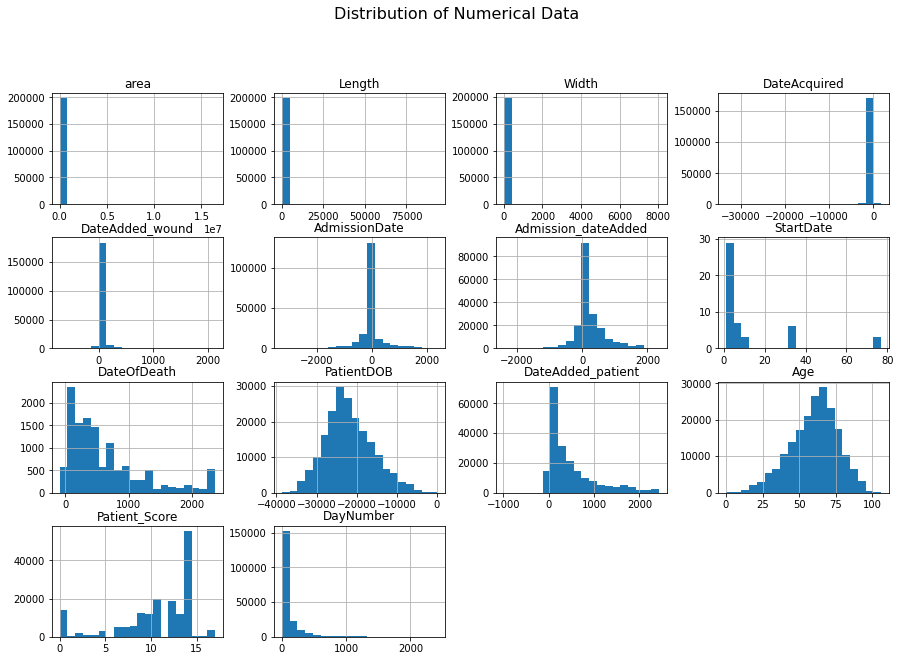

In [8]:
target_column = 'Wound_healing_status'

# Split the data into features (X) and the target variable (y)
X = big_df.drop([target_column], axis=1)

# Assuming X is your DataFrame with numerical columns
numerical_columns = X.select_dtypes(exclude=['category', 'boolean']).columns

# Plot histograms for each numerical column
X[numerical_columns].hist(bins=20, figsize=(15, 10))
plt.suptitle('Distribution of Numerical Data', y=1, fontsize=16)
plt.show()

## BMI column in this dataframe has outliers. Fixing it.. (Not needed, because BMI is not in the columns)

In [9]:
# big_df.loc[big_df['BMI'] >= 1000, 'BMI'] /= 100
# big_df["BMI"].sort_values(ascending=False).head(5000)

## Measurement columns in this dataframe have outliers. Fixing it..

#### Removing the outlier rows where volumn, area, length, width, depth are of really high values

In [10]:
# Function to remove outliers using IQR method for multiple columns
def remove_outliers_iqr_multi(df, columns):
    df_filtered = df.copy()

    for column in columns:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1

        # Define the lower and upper bounds for outliers
        lower_bound = Q1 - 3 * IQR
        upper_bound = Q3 + 3 * IQR

        # Remove rows with values outside the bounds for the current column
        df_filtered = df_filtered[(df_filtered[column] >= lower_bound) & (df_filtered[column] <= upper_bound)]

    return df_filtered

In [11]:
# Specify the columns for outlier removal
columns_to_remove_outliers = ['area', 'Length', 'Width']

# Apply the function to remove outliers from specified columns
df_no_outliers = remove_outliers_iqr_multi(big_df, columns_to_remove_outliers)

df_no_outliers["Length"]=abs(df_no_outliers["Length"])
#df_no_outliers["Depth"]=abs(df_no_outliers["Depth"])

In [12]:
big_df=df_no_outliers

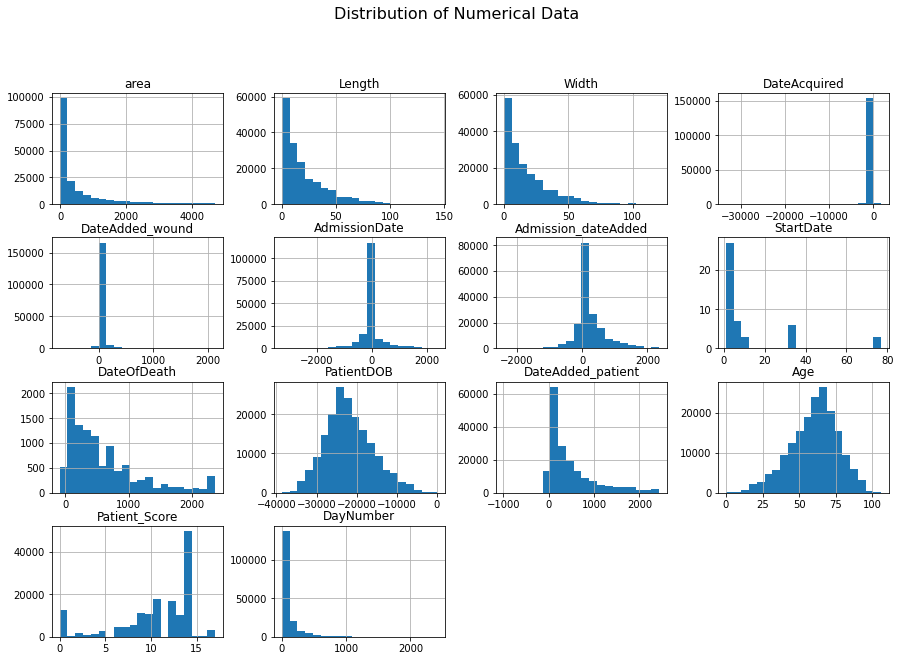

In [13]:
target_column = 'Wound_healing_status'

# Split the data into features (X) and the target variable (y)
X = big_df.drop([target_column], axis=1)

# Assuming X is your DataFrame with numerical columns
numerical_columns = X.select_dtypes(exclude=['category', "boolean"]).columns

# Plot histograms for each numerical column
X[numerical_columns].hist(bins=20, figsize=(15, 10))
plt.suptitle('Distribution of Numerical Data', y=1, fontsize=16)
plt.show()

In [93]:
# # Create an instance of LabelEncoder
# label_encoder = LabelEncoder()

# # Iterate over each column in the dataframe
# for column in big_df.columns:
#     # Check if the column is of object or categorical type
#     if big_df[column].dtype == 'category':
#         print(column)
#         # Fit and transform the categorical column
#         big_df[column] = label_encoder.fit_transform(big_df[column])

In [14]:
big_df.to_csv("big_df_1.csv")

In [15]:
big_df=pd.read_csv("big_df_1.csv")
big_df=big_df.drop(["Unnamed: 0"],axis=1)
big_df

/tmp/ipykernel_278427/2010535524.py:1: DtypeWarning: Columns (4,6,19,20,23,37,38,49,50,51,52,53,54,57,58,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,86,115,116,117,119,129) have mixed types. Specify dtype option on import or set low_memory=False.
  big_df=pd.read_csv("big_df_1.csv")


,AdiposeExposed,AdiposeNecrosisExposed,area,AtrophieBlanche,BoneNecrosisExposed,BrawnyInduration,Callus,CapsuleExposed,CapsuleNecrosisExposed,CompDiet,...,Patient_DocumentType,Age,Patient_RiskLevel,Patient_Score,SmokingStatus,PatientIDWoundNumber,Wound_healing_status,DayNumber,Stage_Type,Updated_Stage
0,True,False,33.60,False,False,False,False,False,False,1.0,...,PatientDocument,65.73,At risk of malnutrition,11.0,3.0,10000074_1,Unknown,1,14_6,Stage 2 Pressure Injury
1,True,False,38.00,False,False,False,False,False,False,1.0,...,PatientDocument,65.75,At risk of malnutrition,11.0,3.0,10000074_1,Not healing,8,14_6,Stage 2 Pressure Injury
2,True,False,40.28,False,False,False,False,False,False,1.0,...,PatientDocument,65.77,At risk of malnutrition,11.0,3.0,10000074_1,Not healing,15,14_6,Stage 2 Pressure Injury
3,True,False,40.28,False,False,False,False,False,False,1.0,...,PatientDocument,65.79,At risk of malnutrition,11.0,3.0,10000074_1,Not healing,22,14_6,Stage 2 Pressure Injury
4,True,False,30.00,False,False,False,False,False,False,1.0,...,PatientDocument,65.81,At risk of malnutrition,11.0,3.0,10000074_1,Grey,29,14_6,Stage 2 Pressure Injury
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
177512,False,False,169.00,False,False,False,False,False,False,1.0,...,PatientDocument,68.86,Normal nutritional status,12.0,4.0,9996014_1,Not healing,72,8_3,Stage 3 Pressure Injury
177513,False,False,130.00,False,False,False,False,False,False,1.0,...,PatientDocument,68.87,Normal nutritional status,12.0,4.0,9996014_1,Grey,75,8_3,Stage 3 Pressure Injury
177514,False,False,110.00,False,False,False,False,False,False,1.0,...,PatientDocument,68.88,Normal nutritional status,12.0,4.0,9996014_1,Not healing,80,8_3,Stage 3 Pressure Injury
177515,False,False,110.00,False,False,False,False,False,False,1.0,...,PatientDocument,68.90,Normal nutritional status,12.0,4.0,9996014_1,Not healing,87,8_3,Stage 3 Pressure Injury


In [16]:
categorical_features=["CompDiet", "CompDressing", "CompExercise", "CompHBOVisits", "CompLimb", "CompMedication",
                      "CompOffLoad", "CompSmoking", "CompWoundVisits", "ExudateAmount", "GranulatedHyperGranulated",
                      "lowerExtremityEdema", "NonGranulationBiofilm", "NonGranulationDessicated", "woundProgress",
                      "Bogginess", "DryEscharFluctance", "AccidentType", "acquiredAtFacility", "Left_Right", 
                      "woundstatus", "AdmissionStatusCode", "CauseOfDeath", "ethnicityCdcCode", "patientEthnicity",
                      "PatientGender", "PatientZIP", "RaceCodeList", "Religion", "SecondaryRaceCodeList", 
                      "Patient_Title", "Patient_DocumentType", "Patient_RiskLevel", "SmokingStatus",
                      "Wound_healing_status", "Stage_Type", "Updated_Stage", "Location"]


# Iterate over columns
for col in big_df.columns:
    for prefix in categorical_features:
        if col.startswith(prefix) or col == prefix:
            big_df[col] = big_df[col].astype('category')

boolean_features=["AdiposeExposed", 'AdiposeNecrosisExposed', 'AtrophieBlanche', 'BoneNecrosisExposed', 
                      'BrawnyInduration', 'Callus', 'CapsuleExposed', 'CapsuleNecrosisExposed', 'Crepitus', 
                      'Cyanosis', 'Denuded', 'DryScaly', 'Ecchymosis', 'Edema', 'Erythema', 'Excoriation', 
                      'ExposedBone', 'ExposedMuscle', 'ExposedTendon', 'Fluctuance', 'Friable', 
                      'GranulationQualityPale', 'GranulationQualityPink', 'GranulationQualityRed', 'greygran', 
                      'Hemosiderosis', 'hypergran', 'Induration', 'Maceration', 'Moist', 'MuscleNecrosisExposed', 
                      'NoMeasurableDepth', 'NormalColor', 'NormalMoisture', 'normalTexture', 'NurseOnlyVisit', 
                      'Pallor', 'pinkgran', 'Rash', 'redgran', 'Rubor', 'Scarring', 'Shiny', 'sinustract', 
                      'SloughLessThan20', 'SSAbscess', 'SSCAndSPending', 'SSChangesInGranulationTissue', 
                      'SSConfirmedLocal', 'SSConfirmedSystemic', 'SSDrainageDisproportionate', 'SSDrainageThick', 
                      'SSFever', 'SSFoulWoundOdor', 'SSIncreasedEdema', 'SSInflammationExtendingToBone', 
                      'SSMalaise', 'SSNewOnset', 'SSOther', 'SSPocketing', 'SSPoorlyDefinedErythemalBorder', 
                      'SSSignsAndSymptoms', 'SSSystemicAntibiotics', 'SSTopicalAntibiotics', 
                      'SSWarmthExtendingBeyondLocalPeriWound', 'SSWoundStalling', 'SSXRay', 'SystematicInfection', 
                      'TendonNecrosisExposed', 'TunnelingOrUndermining', 'ErythemaLocCircumferential', 
                      'NecroticTypeBlackEschar', 'JointNecrosisExposed', 'TendernessOnPalpation', 'ExposedJoint', 
                      'NecroticTypeWetHydrated', 'GranulationQualityHypertrophic', 'NecroticTypeYellowSlough', 
                      'ActiveWound', 'ClusteredWound', 'PendingAmputationOnPresentation', 'ResolvedRecurrence', 
                      'ResultOfAccident', 'WoundRecurrence', 'MedicareAdmission', 'NonWoundDiagnosis', 
                      'PalliativeCare', "PatientSelfCare"]


# Iterate over columns
for col in big_df.columns:
    for prefix in boolean_features:
        if col.startswith(prefix) or col == prefix:
            big_df[col] = big_df[col].astype('boolean')

# Verify the changes
print(big_df.dtypes)

AdiposeExposed                            boolean
AdiposeNecrosisExposed                    boolean
area                                      float64
AtrophieBlanche                           boolean
BoneNecrosisExposed                       boolean
BrawnyInduration                          boolean
Callus                                    boolean
CapsuleExposed                            boolean
CapsuleNecrosisExposed                    boolean
CompDiet                                 category
CompDressing                             category
CompExercise                             category
CompHBOVisits                            category
CompLimb                                 category
CompMedication                           category
CompOffLoad                              category
CompSmoking                              category
CompWoundVisits                          category
Crepitus                                  boolean
Cyanosis                                  boolean


In [18]:
# Create an instance of LabelEncoder
label_encoder = LabelEncoder()

# Iterate over each column in the dataframe
for column in big_df.columns:
    # Check if the column is of object or categorical type
    if big_df[column].dtype.name == 'category':
        print(f"Mapping for {column}:")
        
        # Fit and transform the categorical column
        big_df[column] = label_encoder.fit_transform(big_df[column])
        
        # Print out the mapping of original values to encoded values
        mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
        df = pd.DataFrame.from_dict(mapping, orient='index', columns=['Encoded Values']).reset_index()
        df.columns = ['Original Value', 'Encoded Values']
        display(df)

Mapping for CompDiet:


,Original Value,Encoded Values
0,1.0,0
1,NaN,1


Mapping for CompDressing:


,Original Value,Encoded Values
0,1.0,0
1,NaN,1


Mapping for CompExercise:


,Original Value,Encoded Values
0,1.0,0
1,NaN,1


Mapping for CompHBOVisits:


,Original Value,Encoded Values
0,1.0,0
1,NaN,1


Mapping for CompLimb:


,Original Value,Encoded Values
0,1.0,0
1,NaN,1


Mapping for CompMedication:


,Original Value,Encoded Values
0,1.0,0
1,NaN,1


Mapping for CompOffLoad:


,Original Value,Encoded Values
0,1.0,0
1,NaN,1


Mapping for CompSmoking:


,Original Value,Encoded Values
0,1.0,0
1,NaN,1


Mapping for CompWoundVisits:


,Original Value,Encoded Values
0,1.0,0
1,NaN,1


Mapping for ExudateAmount:


,Original Value,Encoded Values
0,1.0,0
1,2.0,1
2,3.0,2
3,4.0,3
4,5.0,4
5,6.0,5
6,7.0,6
7,NaN,7


Mapping for GranulatedHyperGranulated:


,Original Value,Encoded Values
0,1.0,0
1,NaN,1


Mapping for lowerExtremityEdema:


,Original Value,Encoded Values
0,1.0,0
1,NaN,1


Mapping for NonGranulationBiofilm:


,Original Value,Encoded Values
0,1.0,0
1,NaN,1


Mapping for NonGranulationDessicated:


,Original Value,Encoded Values
0,1.0,0
1,NaN,1


Mapping for woundProgress:


,Original Value,Encoded Values
0,1.0,0
1,2.0,1
2,3.0,2
3,4.0,3
4,NaN,4


Mapping for Bogginess:


,Original Value,Encoded Values
0,1.0,0
1,NaN,1


Mapping for DryEscharFluctance:


,Original Value,Encoded Values
0,1.0,0
1,NaN,1


Mapping for AccidentType:


,Original Value,Encoded Values
0,0.0,0
1,1.0,1
2,2.0,2
3,3.0,3
4,NaN,4


Mapping for acquiredAtFacility:


,Original Value,Encoded Values
0,1.0,0
1,NaN,1


Mapping for Left_Right:


,Original Value,Encoded Values
0,Left,0
1,Right,1
2,NaN,2


Mapping for Location:


,Original Value,Encoded Values
0,1,0
1,2,1
2,3,2
3,4,3
4,5,4
5,6,5
6,7,6
7,8,7
8,9,8
9,10,9


Mapping for woundstatus:


,Original Value,Encoded Values
0,1,0
1,2,1
2,3,2
3,4,3
4,5,4
5,6,5
6,7,6
7,8,7
8,37,8
9,139,9


Mapping for AdmissionStatusCode:


,Original Value,Encoded Values
0,2.0,0
1,NaN,1


Mapping for CauseOfDeath:


,Original Value,Encoded Values
0,COVID-19,0
1,CVA,1
2,Cancer,2
3,Cardiac arrest,3
4,Cardiopulm arrest,4
5,Congestive Heart Failure,5
6,Cranial injuries due to fall,6
7,Heart Failure,7
8,Respiratory related,8
9,Sepsis due to ulcerative colitis,9


Mapping for ethnicityCdcCode:


,Original Value,Encoded Values
0,2135-2,0
1,2186-5,1
2,asku,2
3,NaN,3


Mapping for patientEthnicity:


,Original Value,Encoded Values
0,9.0,0
1,10.0,1
2,11.0,2
3,NaN,3


Mapping for PatientGender:


,Original Value,Encoded Values
0,F,0
1,M,1
2,NaN,2


Mapping for PatientZIP:


,Original Value,Encoded Values
0,12211.0,0
1,19960.0,1
2,27215.0,2
3,28570.0,3
4,28803.0,4
...,...,...
474,89117.0,474
475,90807.0,475
476,94123.0,476
477,99025.0,477


Mapping for RaceCodeList:


,Original Value,Encoded Values
0,1002-5,0
1,2028-9,1
2,2054-5,2
3,2076-8,3
4,2106-3,4
5,2131-1,5
6,asku,6
7,NaN,7


Mapping for Religion:


,Original Value,Encoded Values
0,1.0,0
1,3.0,1
2,5.0,2
3,9.0,3
4,11.0,4
5,12.0,5
6,13.0,6
7,14.0,7
8,15.0,8
9,16.0,9


Mapping for SecondaryRaceCodeList:


,Original Value,Encoded Values
0,2110-5,0
1,NaN,1


Mapping for Patient_Title:


,Original Value,Encoded Values
0,Patient,0
1,NaN,1


Mapping for Patient_DocumentType:


,Original Value,Encoded Values
0,PatientDocument,0
1,NaN,1


Mapping for Patient_RiskLevel:


,Original Value,Encoded Values
0,At risk of malnutrition,0
1,Beyond Risk Range,1
2,Malnourished,2
3,Normal nutritional status,3
4,NaN,4


Mapping for SmokingStatus:


,Original Value,Encoded Values
0,1.0,0
1,2.0,1
2,3.0,2
3,4.0,3
4,5.0,4
5,6.0,5
6,7.0,6
7,8.0,7
8,9.0,8
9,NaN,9


Mapping for Wound_healing_status:


,Original Value,Encoded Values
0,Grey,0
1,Healed,1
2,Healing,2
3,Not healing,3
4,Unknown,4


Mapping for Stage_Type:


,Original Value,Encoded Values
0,10_19,0
1,10_207,1
2,10_208,2
3,10_268,3
4,10_277,4
5,10_279,5
6,10_3,6
7,10_31,7
8,10_37,8
9,10_395,9


Mapping for Updated_Stage:


,Original Value,Encoded Values
0,Deep Tissue Pressure Injury Persistent non-bla...,0
1,Eschar covered,1
2,Full Thickness,2
3,Medical Device Related Pressure Injury,3
4,Partial Thickness,4
5,Stage 1 Pressure Injury,5
6,Stage 2 Pressure Injury,6
7,Stage 3 Pressure Injury,7
8,Stage 4 Pressure Injury,8
9,Unstageable Pressure Injury Obscured full-thic...,9


In [19]:
categorical_features=["CompDiet", "CompDressing", "CompExercise", "CompHBOVisits", "CompLimb", "CompMedication",
                      "CompOffLoad", "CompSmoking", "CompWoundVisits", "ExudateAmount", "GranulatedHyperGranulated",
                      "lowerExtremityEdema", "NonGranulationBiofilm", "NonGranulationDessicated", "woundProgress",
                      "Bogginess", "DryEscharFluctance", "AccidentType", "acquiredAtFacility", "Left_Right", 
                      "woundstatus", "AdmissionStatusCode", "CauseOfDeath", "ethnicityCdcCode", "patientEthnicity",
                      "PatientGender", "PatientZIP", "RaceCodeList", "Religion", "SecondaryRaceCodeList", 
                      "Patient_Title", "Patient_DocumentType", "Patient_RiskLevel", "SmokingStatus",
                      "Wound_healing_status", "Stage_Type", "Updated_Stage", "Location"]


# Iterate over columns
for col in big_df.columns:
    for prefix in categorical_features:
        if col.startswith(prefix) or col == prefix:
            big_df[col] = big_df[col].astype('category')

# Verify the changes
print(big_df.dtypes)

AdiposeExposed                            boolean
AdiposeNecrosisExposed                    boolean
area                                      float64
AtrophieBlanche                           boolean
BoneNecrosisExposed                       boolean
BrawnyInduration                          boolean
Callus                                    boolean
CapsuleExposed                            boolean
CapsuleNecrosisExposed                    boolean
CompDiet                                 category
CompDressing                             category
CompExercise                             category
CompHBOVisits                            category
CompLimb                                 category
CompMedication                           category
CompOffLoad                              category
CompSmoking                              category
CompWoundVisits                          category
Crepitus                                  boolean
Cyanosis                                  boolean


## Removing highly correlated features from the dataframe 
### (First correlation coefficient values will be checked, then if two features are highly correlated (positively or negatively) means the coefficient value is higher than 0.5 then one feature from will removed based on the feature importance values according to XGBoost model.

In [22]:
# Example dataset (replace this with your actual dataset)
data = big_df

# Custom correlation function to handle NaN values
def custom_correlation(x, y, method):
    valid_values = ~np.isnan(x) & ~np.isnan(y)
    if sum(valid_values) < 2:
        # Not enough valid values for correlation calculation
        return np.nan
    x_valid = x[valid_values]
    y_valid = y[valid_values]

    if method == 'pearson':
        # Handle NaN values for Pearson correlation
        mask = np.isfinite(x_valid) & np.isfinite(y_valid)
        correlation_result = pointbiserialr(x_valid[mask], y_valid[mask])
    elif method == 'pointbiserial':
        correlation_result = pointbiserialr(x_valid, y_valid)
    else:
        raise ValueError(f"Unsupported correlation method: {method}")

    return correlation_result

# Create an empty dictionary to store correlation results
correlation_results = {}

# Iterate through numerical columns
numerical_columns = data.select_dtypes(include=['float64', 'int64']).columns
boolean_columns = data.select_dtypes(include='boolean').columns

for numerical_var in numerical_columns:
    # Iterate through all columns
    for column in data.columns:
        # Skip the numerical variable itself
        if column == numerical_var:
            continue

        # Determine data types
        data_type_numerical = data[numerical_var].dtype
        data_type_column = data[column].dtype

        # Apply the appropriate correlation method based on data types
        if data_type_numerical in ['float64', 'int64'] and data_type_column in ['float64', 'int64']:
            # Both variables are numerical - use Pearson correlation
            correlation_result = custom_correlation(data[numerical_var], data[column], 'pearson')
        elif data_type_numerical in ['float64', 'int64'] and data_type_column in ['object', 'category']:
            # Numerical variable and categorical variable - use point-biserial correlation
            # Convert binary categorical data to numeric
            data_numeric = pd.Categorical(data[column]).codes
            correlation_result = custom_correlation(data[numerical_var], data_numeric, 'pointbiserial')
        # Add other cases as needed
        else:
            # Other combinations - skip or handle accordingly
            continue

        # Store the correlation result
        key = f"{numerical_var}_vs_{column}"
        correlation_results[key] = correlation_result

# Print the results
for key, result in correlation_results.items():
    print(f"Correlation {key}:\n{result}\n")


/home/jupyter-apaddo/.local/lib/python3.9/site-packages/scipy/stats/_stats_py.py:4781: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(msg))
/home/jupyter-apaddo/.local/lib/python3.9/site-packages/scipy/stats/_stats_py.py:4781: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(msg))
/home/jupyter-apaddo/.local/lib/python3.9/site-packages/scipy/stats/_stats_py.py:4781: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(msg))
/home/jupyter-apaddo/.local/lib/python3.9/site-packages/scipy/stats/_stats_py.py:4781: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(msg))


Correlation area_vs_CompDiet:
SignificanceResult(statistic=0.008226076159260036, pvalue=0.0005284447049087614)

Correlation area_vs_CompDressing:
SignificanceResult(statistic=0.008226076159260036, pvalue=0.0005284447049087614)

Correlation area_vs_CompExercise:
SignificanceResult(statistic=0.008226076159260036, pvalue=0.0005284447049087614)

Correlation area_vs_CompHBOVisits:
SignificanceResult(statistic=0.008275597600959727, pvalue=0.0004888854911541448)

Correlation area_vs_CompLimb:
SignificanceResult(statistic=0.008226076159260036, pvalue=0.0005284447049087614)

Correlation area_vs_CompMedication:
SignificanceResult(statistic=0.008226076159260036, pvalue=0.0005284447049087614)

Correlation area_vs_CompOffLoad:
SignificanceResult(statistic=0.008226076159260036, pvalue=0.0005284447049087614)

Correlation area_vs_CompSmoking:
SignificanceResult(statistic=0.008226076159260036, pvalue=0.0005284447049087614)

Correlation area_vs_CompWoundVisits:
SignificanceResult(statistic=0.00822607615

In [23]:
df_filtered=big_df

In [24]:
df=df_filtered

In [25]:
X = df.drop([target_column, 'PatientIDWoundNumber'], axis=1)
y = df[target_column]

print("Unique values in the target variable:", y.unique())
print("Data type of the target variable:", y.dtype)
# Convert target variable to integer type
y = y.astype(int)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply SMOTE to the training data
# smote = SMOTE(random_state=42)
# X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

X_train_resampled, y_train_resampled = X_train, y_train

# Standardize features
scaler = StandardScaler()
X_train_resampled_scaled = scaler.fit_transform(X_train_resampled)
X_test_scaled = scaler.transform(X_test)

# Define XGBoost classifier
xgb_classifier = XGBClassifier(tree_method='gpu_hist', random_state=42, enable_categorical=True, max_cat_to_onehot=1)

# Set up the parameter grid for RandomizedSearchCV
param_grid = {
    'learning_rate': [0.01, 0.1, 0.2],
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7, 9],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.9, 1.0],
    'gamma': [0, 0.1, 0.2],
    'min_child_weight': [1, 3, 5],
    'reg_alpha': [0, 0.1, 0.5, 1],
    'reg_lambda': [0, 0.1, 0.5, 1],
}
# Set up RandomizedSearchCV
random_search = RandomizedSearchCV(
    xgb_classifier, param_distributions=param_grid, n_iter=10,
    scoring='accuracy', cv=5, n_jobs=-1, random_state=42
)

# Fit the model on resampled and scaled data using RandomizedSearchCV
random_search.fit(X_train_resampled_scaled, y_train_resampled)

xgb_classifier_important=random_search.best_estimator_

# Fit the model on resampled and scaled data
xgb_classifier_important.fit(X_train_resampled_scaled, y_train_resampled)

rf=xgb_classifier_important

for key, result in correlation_results.items():
    #print(key)
    # Split the string into two parts
    split_parts = key.split('_vs_')
    # Display the result
    
    rule=(type(result)==float)
    if rule==False:
        if abs(round(result[0],4))>0.5:

            print(split_parts)
            print("Correlation Coeff:",round(result[0],4))
            feature1=split_parts[0]
            feature2=split_parts[1]

            columns_to_check = [feature1, feature2]

            # Iterate through the columns and check if each column is present
            if set(columns_to_check).issubset(df.columns):
                print("Both columns are present in the DataFrame.")

                # Print feature importance
                print(f"\nFeature Importance for {feature1}: {pd.Series(rf.feature_importances_, index=X.columns)[feature1]}")
                print(f"Feature Importance for {feature2}: {pd.Series(rf.feature_importances_, index=X.columns)[feature2]}")

                feature_1_importance=pd.Series(rf.feature_importances_, index=X.columns)[feature1]
                feature_2_importance=pd.Series(rf.feature_importances_, index=X.columns)[feature2]

                # Drop the less important feature
                if feature_1_importance < feature_2_importance:
                    df.drop(feature1, axis=1, inplace=True)
                    print("Dropping",feature1,"\n")
                else:
                    df.drop(feature2, axis=1, inplace=True)
                    print("Dropping",feature2,"\n")

    # Display the modified DataFrame
display(df)

Unique values in the target variable: [4, 3, 0, 2, 1]
Categories (5, int64): [0, 1, 2, 3, 4]
Data type of the target variable: category


/home/jupyter-apaddo/.local/lib/python3.9/site-packages/sklearn/utils/extmath.py:1051: RuntimeWarning: invalid value encountered in divide
  updated_mean = (last_sum + new_sum) / updated_sample_count
/home/jupyter-apaddo/.local/lib/python3.9/site-packages/sklearn/utils/extmath.py:1056: RuntimeWarning: invalid value encountered in divide
  T = new_sum / new_sample_count
/home/jupyter-apaddo/.local/lib/python3.9/site-packages/sklearn/utils/extmath.py:1076: RuntimeWarning: invalid value encountered in divide
  new_unnormalized_variance -= correction**2 / new_sample_count


['area', 'Length']
Correlation Coeff: 0.8178
Both columns are present in the DataFrame.

Feature Importance for area: 0.13175688683986664
Feature Importance for Length: 0.007593587040901184
Dropping Length 

['area', 'Width']
Correlation Coeff: 0.8054
Both columns are present in the DataFrame.

Feature Importance for area: 0.13175688683986664
Feature Importance for Width: 0.014848049730062485
Dropping Width 

['Length', 'area']
Correlation Coeff: 0.8178
['Length', 'Width']
Correlation Coeff: 0.5388
['Width', 'area']
Correlation Coeff: 0.8054
['Width', 'Length']
Correlation Coeff: 0.5388
['DateAdded_wound', 'DayNumber']
Correlation Coeff: 0.6545
Both columns are present in the DataFrame.

Feature Importance for DateAdded_wound: 0.006949511356651783
Feature Importance for DayNumber: 0.18307647109031677
Dropping DateAdded_wound 

['AdmissionDate', 'Admission_dateAdded']
Correlation Coeff: 0.5985
Both columns are present in the DataFrame.

Feature Importance for AdmissionDate: 0.0062757548

,AdiposeExposed,AdiposeNecrosisExposed,area,AtrophieBlanche,BoneNecrosisExposed,BrawnyInduration,Callus,CapsuleExposed,CapsuleNecrosisExposed,CompDiet,...,Patient_Title,Patient_DocumentType,Patient_RiskLevel,Patient_Score,SmokingStatus,PatientIDWoundNumber,Wound_healing_status,DayNumber,Stage_Type,Updated_Stage
0,True,False,33.60,False,False,False,False,False,False,0,...,0,0,0,11.0,2,10000074_1,4,1,34,6
1,True,False,38.00,False,False,False,False,False,False,0,...,0,0,0,11.0,2,10000074_1,3,8,34,6
2,True,False,40.28,False,False,False,False,False,False,0,...,0,0,0,11.0,2,10000074_1,3,15,34,6
3,True,False,40.28,False,False,False,False,False,False,0,...,0,0,0,11.0,2,10000074_1,3,22,34,6
4,True,False,30.00,False,False,False,False,False,False,0,...,0,0,0,11.0,2,10000074_1,0,29,34,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
177512,False,False,169.00,False,False,False,False,False,False,0,...,0,0,3,12.0,3,9996014_1,3,72,147,7
177513,False,False,130.00,False,False,False,False,False,False,0,...,0,0,3,12.0,3,9996014_1,0,75,147,7
177514,False,False,110.00,False,False,False,False,False,False,0,...,0,0,3,12.0,3,9996014_1,3,80,147,7
177515,False,False,110.00,False,False,False,False,False,False,0,...,0,0,3,12.0,3,9996014_1,3,87,147,7


In [26]:
df["Wound_healing_status"].unique()

[4, 3, 0, 2, 1]
Categories (5, int64): [0, 1, 2, 3, 4]

In [27]:
df.columns.tolist()

['AdiposeExposed',
 'AdiposeNecrosisExposed',
 'area',
 'AtrophieBlanche',
 'BoneNecrosisExposed',
 'BrawnyInduration',
 'Callus',
 'CapsuleExposed',
 'CapsuleNecrosisExposed',
 'CompDiet',
 'CompDressing',
 'CompExercise',
 'CompHBOVisits',
 'CompLimb',
 'CompMedication',
 'CompOffLoad',
 'CompSmoking',
 'CompWoundVisits',
 'Crepitus',
 'Cyanosis',
 'Denuded',
 'DryScaly',
 'Ecchymosis',
 'Edema',
 'Erythema',
 'Excoriation',
 'ExposedBone',
 'ExposedMuscle',
 'ExposedTendon',
 'ExudateAmount',
 'Fluctuance',
 'Friable',
 'GranulatedHyperGranulated',
 'GranulationQualityPale',
 'GranulationQualityPink',
 'GranulationQualityRed',
 'greygran',
 'Hemosiderosis',
 'hypergran',
 'Induration',
 'lowerExtremityEdema',
 'Maceration',
 'Moist',
 'MuscleNecrosisExposed',
 'NoMeasurableDepth',
 'NonGranulationBiofilm',
 'NonGranulationDessicated',
 'NormalColor',
 'NormalMoisture',
 'normalTexture',
 'NurseOnlyVisit',
 'Pallor',
 'pinkgran',
 'Rash',
 'redgran',
 'Rubor',
 'Scarring',
 'Shiny',


In [28]:
df.to_csv("df_filtered.csv")